In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection as skms
import sklearn.linear_model as sklm
import sklearn.preprocessing as skp
from sklearn.metrics import mean_squared_error,r2_score


In [2]:
startup_dataset=pd.read_csv(r'Startups.csv')

In [3]:
startup_dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
startup_dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
startup_dataset.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [6]:
X=startup_dataset.iloc[:,:-1].values

In [7]:
print(X)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

In [8]:
Y=startup_dataset.iloc[:,4]

In [9]:
print(Y)

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64


In [10]:
label_encoder=skp.LabelEncoder()
X[:,3]=label_encoder.fit_transform(X[:,3])

In [11]:
print(X)

[[165349.2 136897.8 471784.1 2]
 [162597.7 151377.59 443898.53 0]
 [153441.51 101145.55 407934.54 1]
 [144372.41 118671.85 383199.62 2]
 [142107.34 91391.77 366168.42 1]
 [131876.9 99814.71 362861.36 2]
 [134615.46 147198.87 127716.82 0]
 [130298.13 145530.06 323876.68 1]
 [120542.52 148718.95 311613.29 2]
 [123334.88 108679.17 304981.62 0]
 [101913.08 110594.11 229160.95 1]
 [100671.96 91790.61 249744.55 0]
 [93863.75 127320.38 249839.44 1]
 [91992.39 135495.07 252664.93 0]
 [119943.24 156547.42 256512.92 1]
 [114523.61 122616.84 261776.23 2]
 [78013.11 121597.55 264346.06 0]
 [94657.16 145077.58 282574.31 2]
 [91749.16 114175.79 294919.57 1]
 [86419.7 153514.11 0.0 2]
 [76253.86 113867.3 298664.47 0]
 [78389.47 153773.43 299737.29 2]
 [73994.56 122782.75 303319.26 1]
 [67532.53 105751.03 304768.73 1]
 [77044.01 99281.34 140574.81 2]
 [64664.71 139553.16 137962.62 0]
 [75328.87 144135.98 134050.07 1]
 [72107.6 127864.55 353183.81 2]
 [66051.52 182645.56 118148.2 1]
 [65605.48 153032.0

In [12]:
onehotencoder=skp.OneHotEncoder(categorical_features=[3])
X=onehotencoder.fit_transform(X).toarray()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [13]:
print(X)

[[0.0000000e+00 0.0000000e+00 1.0000000e+00 1.6534920e+05 1.3689780e+05
  4.7178410e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 1.6259770e+05 1.5137759e+05
  4.4389853e+05]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 1.5344151e+05 1.0114555e+05
  4.0793454e+05]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 1.4437241e+05 1.1867185e+05
  3.8319962e+05]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 1.4210734e+05 9.1391770e+04
  3.6616842e+05]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 1.3187690e+05 9.9814710e+04
  3.6286136e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 1.3461546e+05 1.4719887e+05
  1.2771682e+05]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 1.3029813e+05 1.4553006e+05
  3.2387668e+05]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 1.2054252e+05 1.4871895e+05
  3.1161329e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 1.2333488e+05 1.0867917e+05
  3.0498162e+05]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 1.0191308e+05 1.1059411e+05
  2.2916095e+05]
 [1.0000000e+00 0.000

In [14]:
X=X[:,1:]

In [15]:
print(X)

[[0.0000000e+00 1.0000000e+00 1.6534920e+05 1.3689780e+05 4.7178410e+05]
 [0.0000000e+00 0.0000000e+00 1.6259770e+05 1.5137759e+05 4.4389853e+05]
 [1.0000000e+00 0.0000000e+00 1.5344151e+05 1.0114555e+05 4.0793454e+05]
 [0.0000000e+00 1.0000000e+00 1.4437241e+05 1.1867185e+05 3.8319962e+05]
 [1.0000000e+00 0.0000000e+00 1.4210734e+05 9.1391770e+04 3.6616842e+05]
 [0.0000000e+00 1.0000000e+00 1.3187690e+05 9.9814710e+04 3.6286136e+05]
 [0.0000000e+00 0.0000000e+00 1.3461546e+05 1.4719887e+05 1.2771682e+05]
 [1.0000000e+00 0.0000000e+00 1.3029813e+05 1.4553006e+05 3.2387668e+05]
 [0.0000000e+00 1.0000000e+00 1.2054252e+05 1.4871895e+05 3.1161329e+05]
 [0.0000000e+00 0.0000000e+00 1.2333488e+05 1.0867917e+05 3.0498162e+05]
 [1.0000000e+00 0.0000000e+00 1.0191308e+05 1.1059411e+05 2.2916095e+05]
 [0.0000000e+00 0.0000000e+00 1.0067196e+05 9.1790610e+04 2.4974455e+05]
 [1.0000000e+00 0.0000000e+00 9.3863750e+04 1.2732038e+05 2.4983944e+05]
 [0.0000000e+00 0.0000000e+00 9.1992390e+04 1.35495

In [16]:
X_train,X_test,Y_train,Y_test=skms.train_test_split(X,Y,test_size=0.2,random_state=0)

In [17]:
lm=sklm.LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
prediction=lm.predict(X_test)

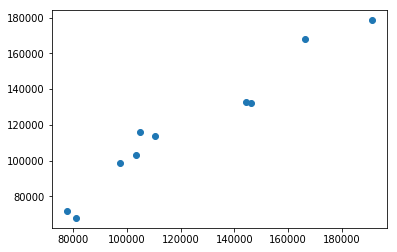

In [19]:
plt.scatter(Y_test,prediction)


In [22]:
print("Mean squared error : %.2f"
      % mean_squared_error(Y_test,prediction))


print('Variance score: %.2f' % r2_score(Y_test,prediction))

Mean squared error : 83502864.03
Variance score: 0.93
